# Interpreting an AB Test

In [1]:
# estimate sample size via power analysis
import statsmodels as sm
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.weightstats import ttest_ind
import pandas as pd



def cohen_d(mean_1, mean_2, pooled_sd):
    diff = (mean_1 - mean_2)
    cohen_d = diff/pooled_sd
    return(cohen_d)
    





* Calculate Cohen's D for increasing click rate from 3% to 8%.
* Assume the pooled standard deviation to be 14

`Mean 1 - Mean 2 / pooled SD`

In [5]:
cohen_d(5,10,17)

-0.29411764705882354

According to the rule of thumb given by Cohen, how big of an effect size is this?


Given this effect size, how many samples will we need to collect in order to not make a type II error?

In [11]:
# Set Parameters 

effect = .29
alpha = .05
power = .9

# Perform Power Analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 250.843


In [17]:
import pandas as pd

df = pd.read_csv("experiment_data.csv")

print("The Baseline Average was: ", df['baseline'].mean())
print("The Experimental Average was: ", df['experiment'].mean())

bl = df['baseline'].mean()
ex = df['experiment'].mean()

ex_sd = df['experiment'].std()



cohen_d(bl, ex, ex_sd)


The Baseline Average was:  5.7554260891793865
The Experimental Average was:  8.607012143722065


-1.5508005846113697

In [13]:
df = pd.read_csv("experiment_data.csv")

df

big_test = sm.stats.weightstats.ttest_ind(df['baseline'], 
                               df['experiment'], 
                               alternative='two-sided', 
                               usevar='pooled', value=0)
                                                          
                                                          
print("The critical value is:", big_test[0])
print("The p value value is:", big_test[1])                                                          
print("Degrees of Freedom:", big_test[2]) 



The critical value is: -12.735895121086049
The p value value is: 3.046638134432578e-29
Degrees of Freedom: 262.0


In [ ]:
!ls

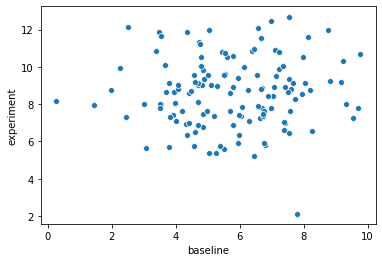

# Your Turn! 

Find the file `experiment_data_small.csv` in the current working directory and run a t-test on this data.

* First report the p value of the test
* Second, write a statement on what the p value means
* Third, use the function from above to calculate the effect size
* Fourth, write a paragraph reccomending if we should adopt the change made by the second AB test we have run!

Be prepared to be assigned to a side where you advocate for adopting the new change or not adopting the new change!